In [3]:
import numpy as np
import tensorflow as tf

import matplotlib.patches as mpatches

import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
x_data = np.random.rand(100).astype(np.float32) 

In [5]:
y_data = x_data * 3 + 2
# 定义一个向量生成器 加一个遵循正态分布的随机误差
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

In [6]:
help(np.vectorize)

Help on class vectorize in module numpy.lib.function_base:

class vectorize(builtins.object)
 |  vectorize(pyfunc, otypes=None, doc=None, excluded=None, cache=False,
 |            signature=None)
 |  
 |  Generalized function class.
 |  
 |  Define a vectorized function which takes a nested sequence of objects or
 |  numpy arrays as inputs and returns an single or tuple of numpy array as
 |  output. The vectorized function evaluates `pyfunc` over successive tuples
 |  of the input arrays like the python map function, except it uses the
 |  broadcasting rules of numpy.
 |  
 |  The data type of the output of `vectorized` is determined by calling
 |  the function with the first element of the input.  This can be avoided
 |  by specifying the `otypes` argument.
 |  
 |  Parameters
 |  ----------
 |  pyfunc : callable
 |      A python function or method.
 |  otypes : str or list of dtypes, optional
 |      The output data type. It must be specified as either a string of
 |      typecode ch

In [7]:
# 开始拟合准备
# a、b分别代表线性拟合Y=AX+B中的的A和B。其后的1.0和0.2位初始值，
# 您可以更改为任意值，通过以下的拟合，将会找到适合模拟数据的a、d的值，就是上面定义的3和2（但是会有一些误差，因为加入了随机数）。
a = tf.Variable(1.0)

b = tf.Variable(0.2)

y = a * x_data + b

In [8]:
# 损失函数
loss = tf.reduce_mean(tf.square(y - y_data))

In [9]:
# 学习速率
optimizer = tf.train.GradientDescentOptimizer(0.5)

train = optimizer.minimize(loss)

In [10]:
init = tf.global_variables_initializer()

sess = tf.Session()

sess.run(init)

In [11]:
train_data = []

for step in range(100):

    evals = sess.run([train,a,b])[1:]

    if step % 5 == 0:

        print(step, evals)

        train_data.append(evals)

0 [2.6143243, 3.029652]
5 [2.4600945, 2.2901418]
10 [2.6045418, 2.2123291]
15 [2.7113683, 2.1536474]
20 [2.7907288, 2.1100554]
25 [2.8496845, 2.0776715]
30 [2.8934817, 2.0536144]
35 [2.926018, 2.0357425]
40 [2.9501884, 2.0224657]
45 [2.9681444, 2.0126028]
50 [2.9814835, 2.0052755]
55 [2.9913929, 1.9998325]
60 [2.9987543, 1.9957889]
65 [3.004223, 1.992785]
70 [3.0082858, 1.9905534]
75 [3.0113037, 1.9888957]
80 [3.0135458, 1.9876641]
85 [3.0152113, 1.9867492]
90 [3.0164487, 1.9860694]
95 [3.0173678, 1.9855646]


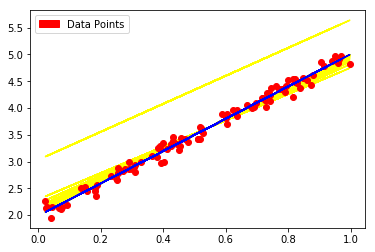

[3.01793, 1.9852558]


In [12]:
converter = plt.colors

for f in train_data:

    [a, b] = f

    f_y = np.vectorize(lambda x: a*x + b)(x_data)

    line = plt.plot(x_data, f_y)

    plt.setp(line, color=(1,1,0))

plt.plot(x_data, y_data, 'ro')

fy = x_data*evals[0]+evals[1]

line = plt.plot(x_data, f_y)

plt.setp(line, color=(0,0,1))

f_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[f_line])

plt.show()

print(evals)